# 6.2 Exploring relationships

# This script contains the following:
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships
 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots

# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# reminding phyton the parent folder path
path = r'C:\Users\juank\Documents\World Hapinnes'

In [3]:
# #Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', ''2019_Cleaned.csv'), index_col = False) ')

# Data Cleaning

In [4]:
df.head()

,Unnamed: 0,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
# Removing unnamed:0 column
df=df.drop(columns=['Unnamed: 0'])

In [7]:
# Check columns data type for compatibility with plots 
df.dtypes

Overall rank                   int64
Country                       object
Region                        object
Score                        float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

# Exploring Relationsips

# Correlations

In [8]:
# select only relevant columns for correlation matriz
correlated_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom ',
                      'Generosity', 'Perceptions of corruption']

In [9]:
df_correlation = df[correlated_columns]

In [10]:
# # Create a correlation matrix using pandas
df_correlation.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


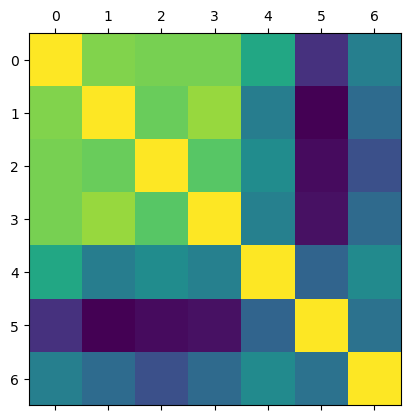

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_correlation.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

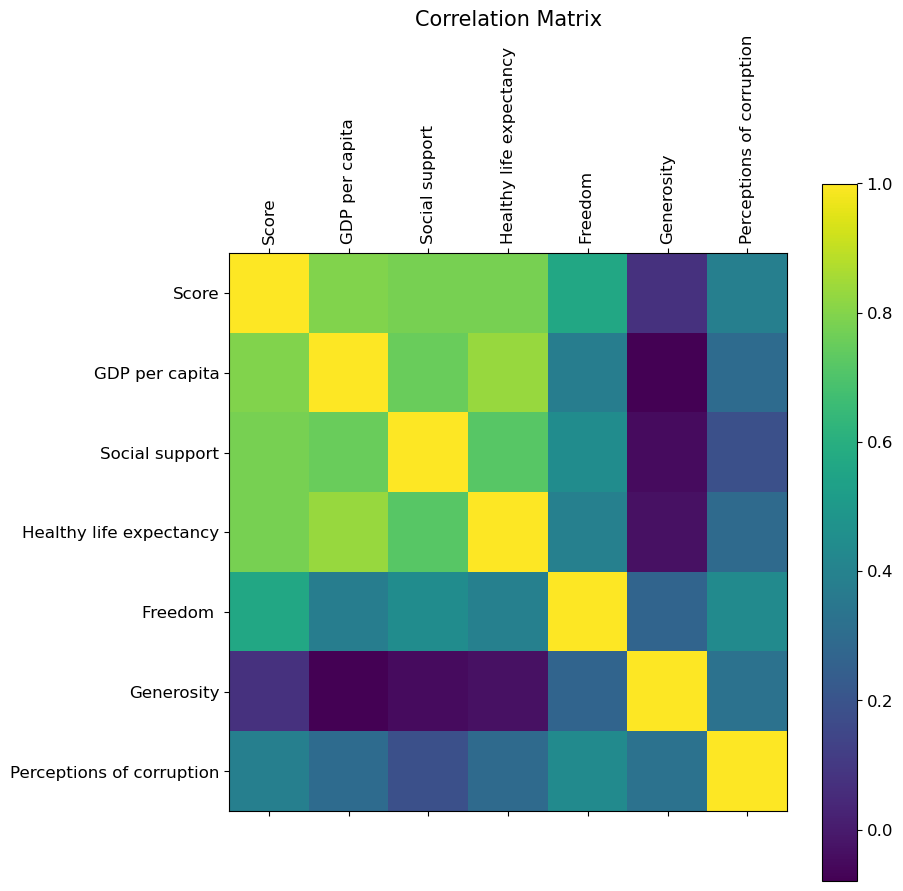

In [14]:
#Next, we add a legend, column labels, change the size of the heatmap and add a title
f=plt.figure(figsize=(9,9)) #This establishes the size of the heatmap
plt.matshow(df_correlation.corr(), fignum=f.number) #Defines the type of plot
plt.xticks(range(df_correlation.shape[1]), df_correlation.columns, fontsize=12, rotation=90)
plt.yticks(range(df_correlation.shape[1]), df_correlation.columns, fontsize=12) #No need for rotation in y-axis
cb=plt.colorbar() #add a color legend (optimizes itseld based on colors used in heatmap)
cb.ax.tick_params(labelsize=12) #add font size
plt.title('Correlation Matrix', fontsize=15) #Creates titles

In [30]:
# save the graphic
plt.savefig('df_correlation_matrix.png')

<Figure size 640x480 with 0 Axes>

# The intensity of color in a square indicates the strength of the relationship between the two variables. A darker color signifies a stronger negative relationship, whereas a lighter color indicates a stronger positive relationship between the variables.

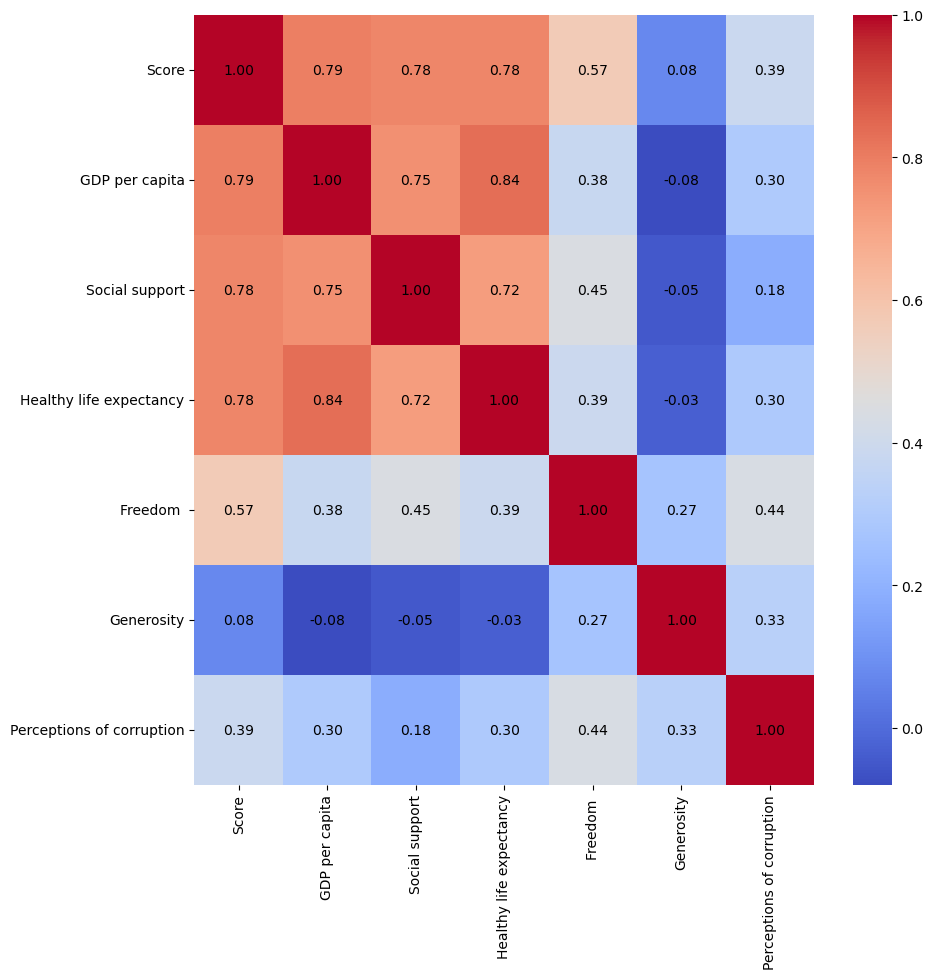

In [19]:
f, ax = plt.subplots(figsize=(10, 10))
corr = sns.heatmap(df_correlation.corr(), annot=False, ax=ax, cmap='coolwarm')

# Manually add correlation values ​​as annotations. (I don't understand why they don't appear directly on the graph)
for i in range(len(df_correlation.columns)):
    for j in range(len(df_correlation.columns)):
        text = '{:.2f}'.format(df_correlation.corr().iloc[i, j])
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.show()

In [31]:
# save graphic
plt.savefig('heatmap.png')

<Figure size 640x480 with 0 Axes>

# The coefficients in the plot indicate the strength and direction of the linear relationship between variables. A coefficient near +1 or -1 signifies a strong correlation, while a coefficient closer to 0 suggests a weaker correlation. Understanding these coefficients helps interpret how variables may influence each other.

# Scatterplot

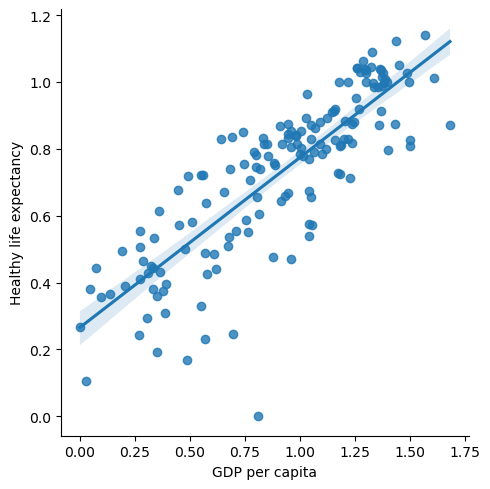

In [20]:
#Create a scatterplot for the "GDP per capita" and "Healthy life Expectancy" columns in seaborn

sns.lmplot(x = 'GDP per capita', y = 'Healthy life expectancy', data = df)

In [36]:
plt.savefig('lmplot.png')


<Figure size 640x480 with 0 Axes>

# the plot suggests that wealthier countries tend to have longer healthy life expectancies.there is some dispersion around the trend line, suggesting that other factors might also influence healthy life expectancy beyond GDP per capita.

# Pairplots


C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

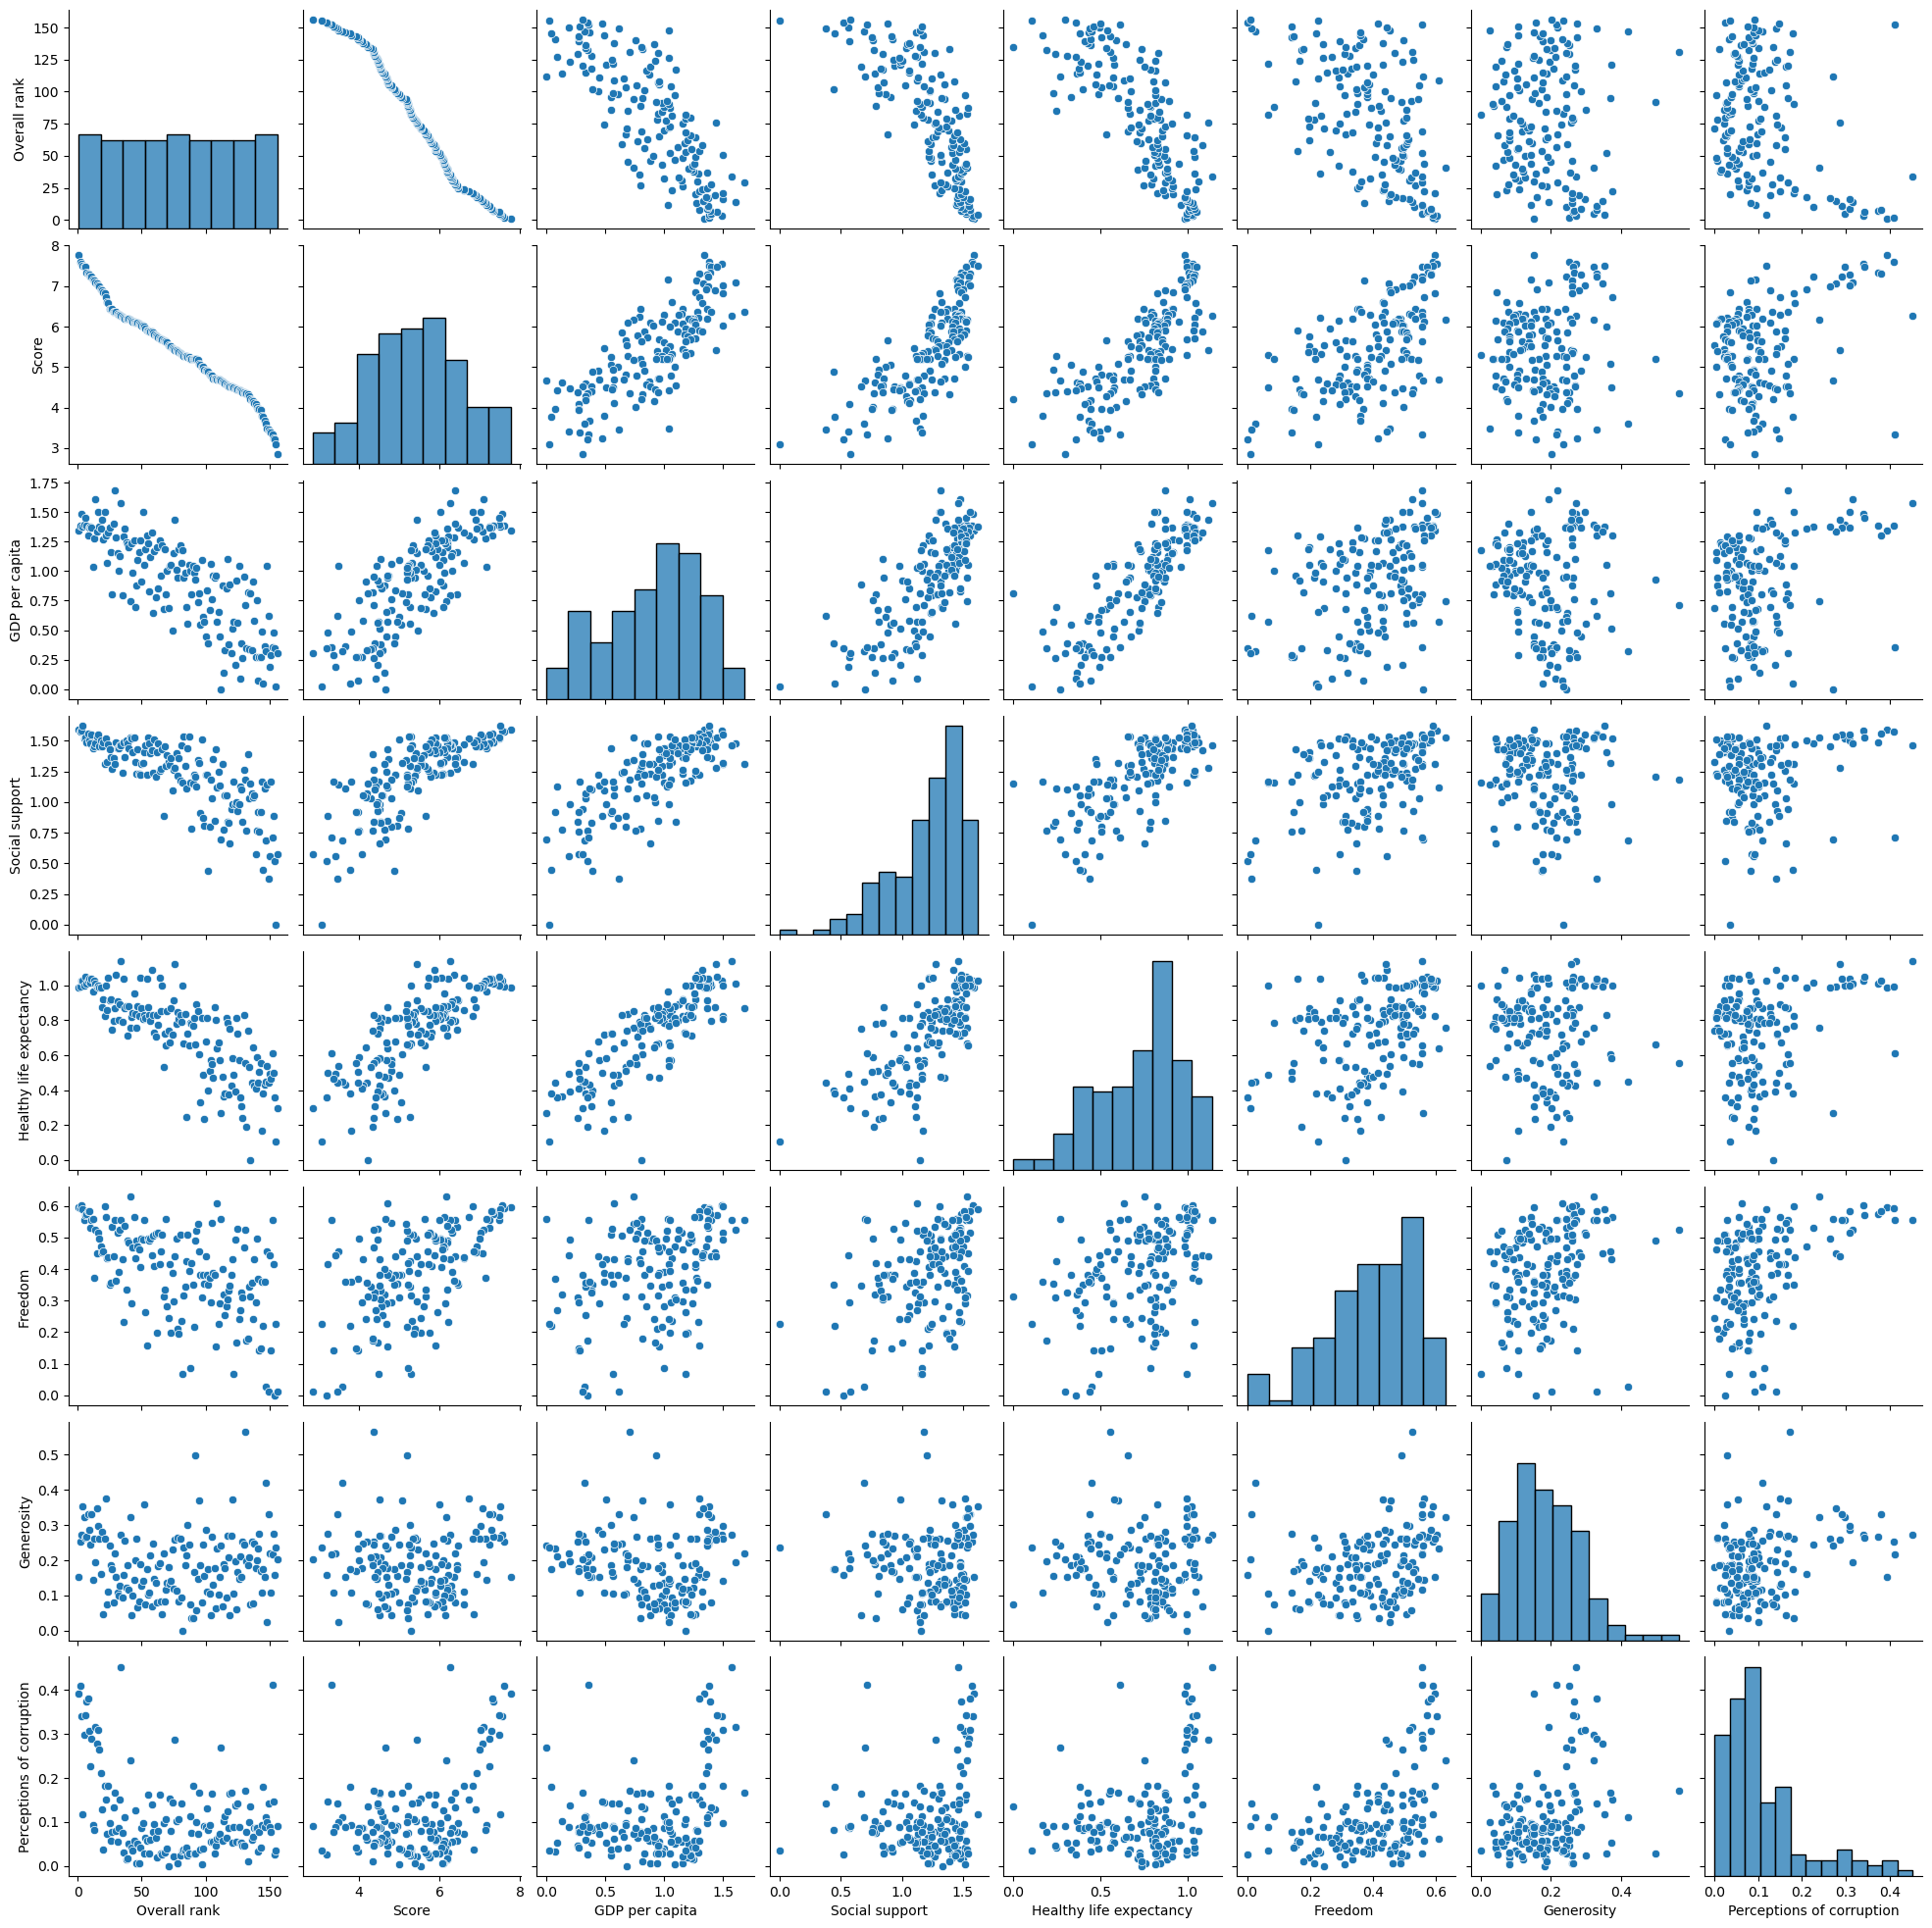

In [21]:
# Create a pair plot 

g = sns.pairplot(df)

In [41]:
# save figure
g.savefig("pairplot1.png")

# Distributions (diagonal)- I choose three variables

Score: The distribution is slightly left-skewed, with a slight concentration around medium-high values.
GDP per Capita: This distribution is right-skewed, with a concentration of countries having lower GDP per capita and fewer countries 
with high GDP per capita.
Perception of Corruption: The distribution is right-skewed, indicating that most countries have a high perception of corruption.

# Pairwise Relationships (Off-diagonal)
Overall Rank vs. GDP per Capita, Social Support, Healthy Life Expectancy, Freedom: There are noticeable negative relationships, indicating 
that better rankings (lower values) are associated with higher GDP per capita, better social support, higher healthy life expectancy, and 
more freedom.
Score vs. GDP per Capita, Social Support, Healthy Life Expectancy, Freedom: Positive relationships are evident, showing that higher happiness scores are associated with higher values in these variables.

# Variables to Explore Further
GDP per capita its positive relationships with several other variables (Score, Social Support, Healthy Life Expectancy, Freedom) suggest it plays a significant
role in overall happiness and well-being.


# Categorical Plots

C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP per capita', ylabel='Count'>

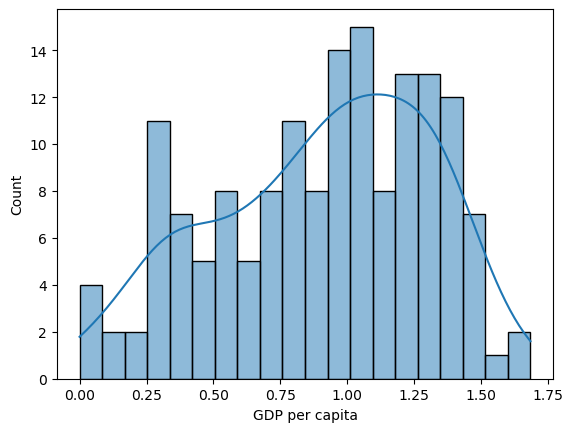

In [22]:
# Creating a categorical variable that splits the "GDP per capita" column into categories
sns.histplot(df['GDP per capita'], bins = 20, kde = True)

In [37]:
plt.savefig('GDP_categorical.png')

<Figure size 640x480 with 0 Axes>

In [23]:
df.loc[df['GDP per capita'] < 0.56, 'GDP category'] = 'Low GDP'

In [24]:
df.loc[(df['GDP per capita'] >=0.56) & (df['GDP per capita'] < 1.12), 'GDP category'] = 'Middle GDP'

In [25]:
df.loc[df['GDP per capita'] >= 1.12, 'GDP category'] = 'High GDP'

In [26]:
df['GDP category'].value_counts(dropna = False)

GDP category
Middle GDP    67
High GDP      55
Low GDP       34
Name: count, dtype: int64

C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


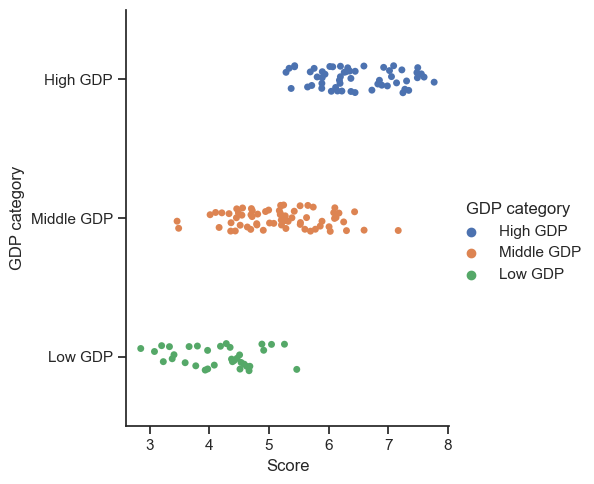

In [27]:
# Create a categorical plot in seaborn using the GDP categories created above
sns.set(style="ticks")
g = sns.catplot(x="Score", y="GDP category", hue="GDP category", data=df)

In [38]:
g.savefig('catplot.png')

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")
# Create histogram of happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=20, kde=True, color='skyblue')
# Add title and labels
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Key Questions

# Is there any correlation between GDP per capita and happiness score?
Yes, there is a strong positive correlation.According to the correlation matrix, the correlation coefficient score is 0.793883. This indicates that as GDP per capita increases, the happiness score tends to increase as well.

# Which factors  have the greatest influence on happiness score?
It seems that the variables with the highest correlations with the happiness score are GDP per capita (0.793883), social support (0.777058), and healthy life expectancy (0.779883).

# Is there any relationship between trust in government and happiness score?
As the perception of corruption decreases (less perceived corruption), there tends to be higher happiness scores. However, the data dispersion suggests that this relationship is not very strong, supported by the correlation value of 0.38, indicating a moderate correlation.

# Can any trend be observed between happiness score and perceived freedom in a country?
Although there is a positive correlation between the two variables, the pairplot graph shows a scattered data grouping, suggesting that the relationship between them may be more complex or less direct than expected, potentially influenced by other factors.

# What role does generosity play in determining happiness?
El gráfico de pair plots muestra que la generosidad tiene una relación positiva pero más débil con la felicidad (Score) en comparación con otros factores. Esto indica que, aunque ser generoso y estar en una comunidad generosa puede contribuir a la felicidad, su impacto no es tan pronunciado como el de otros indicadores.

res.


# Hypothesis  GDP per Capita and Happiness
It suggests that economic prosperity contributes to overall happiness by providing individuals with access to better living standards, amenities, and opportunities for personal growth and fulfillment.